In [1]:
%matplotlib inline

In [2]:
import GHRGbuild
import networkx as nx
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
n = 3**9
n_levels = 3
groups_per_level = 3
c_bar = 50
snr = 4.5

D_actual=GHRGbuild.createAsymGHRG(n,snr,c_bar,n_levels,groups_per_level)

Hierarchy Level:  0 | KS Detectable:  True | Link Probabilities in / out per block:  0.004064421074023269 0.00177818421988518
Hierarchy Level:  1 | KS Detectable:  True | Link Probabilities in / out per block:  0.007403683732186147 0.0023947897449418296
Hierarchy Level:  2 | KS Detectable:  True | Link Probabilities in / out per block:  0.015209813924391745 0.0035006186360833497


Are the Omega matrices correct as is?!

In [3]:
#### print D_actual.node[0]
# first level split
print 3**8*0.001778*2 + 3**8*0.004 # ~50
# second level split
print 3**8*0.001778*2 + 3**7*0.00239*2 + 3**7*0.0074 
# third level split
print 3**8*0.001778*2 + 3**7*0.0023945*2 + +3**6*0.0035006*2 + 3**6*0.0152098 

49.574916
49.968576
49.996278


The average degree of nodes at first level (should be about 50) -- so the Omega matrix appears to be correct.  
Lets print the full dendrogram -- ordering was inversed. Fixed now!

In [4]:
for node in D_actual.nodes():
    print D_actual.node[node]

{'level': 0, 'n': 19683, 'nnodes': array([    0,     1,     2, ..., 19680, 19681, 19682]), 'Nr': array([[       0., 43046721., 43046721.],
       [       0.,        0., 43046721.],
       [       0.,        0.,        0.]]), 'children': [1, 2, 3], 'Er': array([[    0., 76545., 76545.],
       [    0.,     0., 76545.],
       [    0.,     0.,     0.]])}
{'level': 1, 'n': 6561, 'nnodes': array([   0,    1,    2, ..., 6558, 6559, 6560]), 'Nr': array([[21520080.]]), 'children': [], 'Er': array([[87466.66666667]])}
{'level': 1, 'n': 6561, 'nnodes': array([ 6561,  6562,  6563, ..., 13119, 13120, 13121]), 'Nr': array([[21520080.]]), 'children': [], 'Er': array([[87466.66666667]])}
{'level': 1, 'n': 6561, 'nnodes': array([13122, 13123, 13124, ..., 19680, 19681, 19682]), 'Nr': array([[      0., 4782969., 4782969.],
       [      0.,       0., 4782969.],
       [      0.,       0.,       0.]]), 'children': [4, 5, 6], 'Er': array([[    0.        , 11454.20511157, 11454.20511157],
       [    0.  

Dendrogram looks mostly correct. Some quick checks

In [5]:
# last level should be Nr and Er
print 729*(729-1)/2
print 729*(729-1)/2 * 0.0152

265356.0
4033.4112


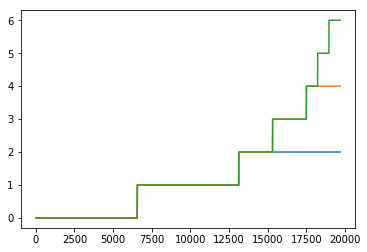

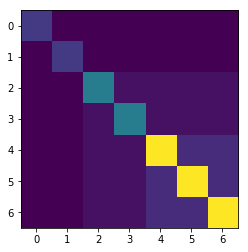

In [6]:
omega = D_actual.construct_full_block_params()
for part in D_actual.get_partition_all():
    plt.plot(part)

plt.figure()
plt.imshow(omega)

In [7]:
g = D_actual.generateNetworkExactProb()

In [8]:
A=D_actual.to_scipy_sparse_matrix(g)

[1, 2, 3]

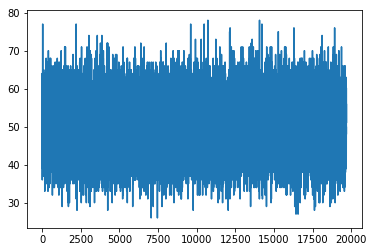

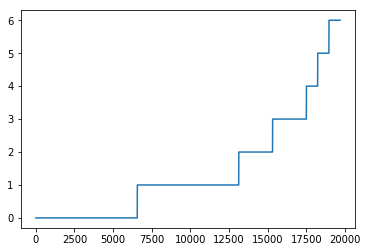

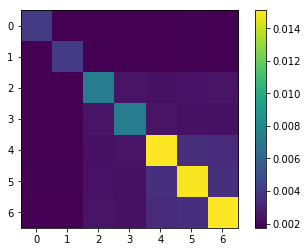

In [9]:
import helperfunctions
pvec = D_actual.get_partition_at_level(-1)[0]
plt.figure()
plt.plot(A.sum(axis=1))
plt.figure()
plt.plot(pvec)

H = helperfunctions.create_partition_matrix_from_vector(pvec)
Omegahat = H.T*A*H / (H.T.sum(axis=1)* H.T.sum(axis=1).T)
plt.figure()
plt.imshow(Omegahat.A)
plt.colorbar()

D_actual.node[0]['children']

In [10]:
D_actual.checkDetectabliityGeneralSBM()

(4.500000000000004+0j)

number nodes /groups
(19683, 7)


HIER SPECTRAL PARTITION -- agglomerative

Initial partition into 7 groups 

List of partitions to assess:  [1 2 3 4 5 6 7] 

Current shape of network:  (19683, 19683) 

Current levels:  [7] 

Ks, local_min, below_thresh, levels
[1 2 3 4 5 6 7] [3 5] [] []
list_candidate_agglomeration
[1 2 3 4 5 6 7]
levels
[1, 7]
levels updated
[1 7]
levels returned
[7]
selected (before),  [6]
Ks:  [1 2 3 4 5 6 7]  selected:  []
Minima at []
selectecd == []  []
HIER SPECTRAL PARTITION -- agglomerative
 Partitions into [7] groups 



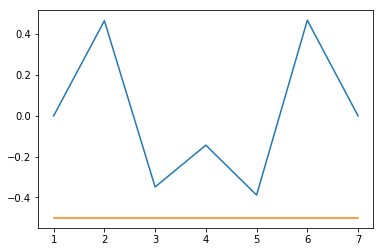

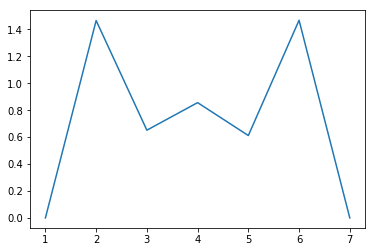

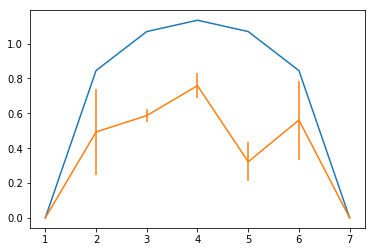

In [16]:
import spectral_algorithms_new as spectral_new
inf_pvec = spectral_new.hier_spectral_partition(A, reps=20)

In [17]:
import metrics
from sklearn.metrics import adjusted_mutual_info_score
true_pvec = D_actual.get_partition_all()
score_matrix = metrics.calculate_level_comparison_matrix(inf_pvec, true_pvec)
print score_matrix

[[0.41890418 0.57797689 0.62900567]]


In [13]:
print score_matrix

[[0.41902929 0.57810272 0.62902855]]


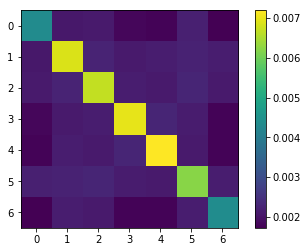

In [150]:
H = helperfunctions.create_partition_matrix_from_vector(inf_pvec[0])
Omegahat = H.T*A*H / (H.T.sum(axis=1)* H.T.sum(axis=1).T)
plt.figure()
plt.imshow(Omegahat.A)
plt.colorbar()

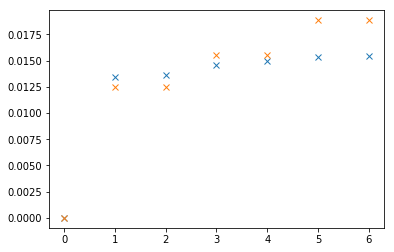

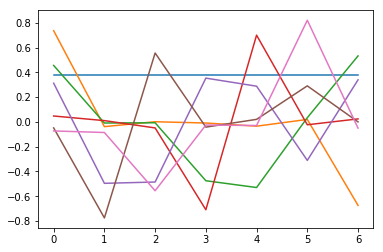

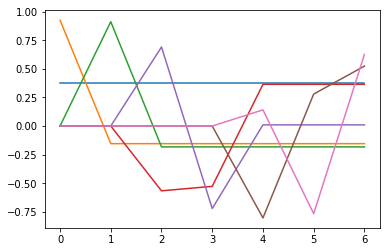

In [169]:
import scipy.linalg
L = spectral_new.construct_graph_Laplacian(Omegahat)
eigvals, eigvec = scipy.linalg.eigh(L)
Ltrue = spectral_new.construct_graph_Laplacian(omega)
eigvals2, eigvec2 = scipy.linalg.eigh(Ltrue)
plt.figure()
plt.plot(eigvals,'x')
plt.plot(eigvals2,'x')
plt.figure()
plt.plot(eigvec)
plt.figure()
plt.plot(eigvec2)